# Contents
1. Imports
2. Checks
3. Wrangling
4. Cleaning
5. Exports

# 1. Imports

In [2]:
#Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Path
path = r'/Users/davidgriesel/Documents/GitHub/202409_OGS'

In [4]:
#Dataset
df_products = pd.read_csv(os.path.join(path, '02 - Data', 'Original Data', 'products.csv'))

# 2. Checks

In [5]:
#Dimensions
df_products.shape

(49693, 5)

In [6]:
#Preview
df_products.head()

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3


In [7]:
#Summary stats
df_products.describe()

,product_id,aisle_id,department_id,prices
count,49693.000000,49693.000000,49693.000000,49693.000000
mean,24844.345139,67.770249,11.728433,9.994136
std,14343.717401,38.316774,5.850282,453.519686
min,1.000000,1.000000,1.000000,1.000000
25%,12423.000000,35.000000,7.000000,4.100000
50%,24845.000000,69.000000,13.000000,7.100000
75%,37265.000000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,99999.000000


##### Observations:
- Dataset contains 49,693 records
- Possible duplicate records in product_id
- Possible inaccurate or outlier values in prices

# 3. Wrangling

## 3.1. Drop Columns

### 3.1.1. Identify Redundant Columns

In [8]:
#Check frequency distribution of variable
df_products['product_id'].value_counts(dropna = False)

product_id
6800     2
35491    2
18458    2
462      2
35306    2
        ..
16567    1
16568    1
16569    1
16570    1
49688    1
Name: count, Length: 49686, dtype: int64

##### Observations:
- 49,686 unique values ranging between 1 and 49,688 including duplicate values
- With 49,693 records the datset contains combination of missing and duplicate records
- Retain column

In [9]:
#Check frequency distribution of variable
df_products['product_name'].value_counts(dropna = False)

product_name
NaN                                                     16
Black House Coffee Roasty Stout Beer                     2
Adore Forever Body Wash                                  2
Gluten Free Organic Peanut Butter & Chocolate Cereal     2
Fiber 4g Gummy Dietary Supplement                        2
                                                        ..
Kosher Dill Mini Pickles                                 1
Chili Rice Scooter                                       1
All Natural Chicken Apple Sausage                        1
Quartered Artichoke Hearts                               1
Fresh Foaming Cleanser                                   1
Name: count, Length: 49673, dtype: int64

##### Observations:
- 49,673 unique values including 16 NaN values and duplicate values
- With 49,693 records the datset contains combination of missing and duplicate records
- Count of product_name not consistent with count of product_id which as expected indicating possible inaccuracies
- Retain columns

In [10]:
#Check frequency distribution of variable
df_products['aisle_id'].value_counts(dropna = False)

aisle_id
100    1258
45     1246
37     1091
47     1038
120    1026
       ... 
113      47
82       44
32       32
68       26
18       12
Name: count, Length: 134, dtype: int64

##### Observations:
- 134 unique values ranging between 1 and 134
- Products are located in 134 different aisles
- Retain column

In [11]:
#Check frequency distribution of variable
df_products['department_id'].value_counts(dropna = False)

department_id
11    6565
19    6264
13    5371
7     4365
1     4007
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1116
18    1081
5     1056
8      972
12     907
2      548
10      38
Name: count, dtype: int64

In [12]:
#Count values
df_products['department_id'].nunique(dropna = False)

21

##### Observations:
- 21 values ranging between 1 and 21
- Products belong to one of 21 departments
- Retain column

In [13]:
#Check frequency distribution of variable
df_products['prices'].value_counts(dropna = False)

prices
2.5        470
5.3        458
6.2        451
2.6        447
5.4        444
          ... 
21.0         1
99999.0      1
21.4         1
15.6         1
18.3         1
Name: count, Length: 242, dtype: int64

##### Observations:
- 242 unique values ranging between 1 and 99999.00
- With a mean of 9.99 and 75% of population below 11.2 the variable likely contains severe outliers or inaccurate values
- Retain column

### 3.1.2. Address Redundant Columns

##### Observations:
- No redundant columns identified

## 3.2. Rename Columns

### 3.2.1. Identify Unclear Descriptions

In [14]:
#Check Column Descriptions
df_products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices'], dtype='object')

##### Observations:
- Variables are described clearly

### 3.2.2. Address Unclear Descriptions

##### Observations:
- No unclear descriptions noted

## 3.3. Data Types

### 3.3.1. Identify Inconsistent Data Types

In [15]:
#Check data types
df_products.dtypes

product_id         int64
product_name      object
aisle_id           int64
department_id      int64
prices           float64
dtype: object

##### Observations:
- Data types are consistent with contents of variables

### 3.3.2. Address Inconsistent Data Types

##### Observations:
- No inconsistencies noted

# 4. Cleaning

## 4.1. Accuracy

### 4.1.1. Identify Inaccurate Values

In [16]:
#Review descriptive statistics
df_products.describe()

,product_id,aisle_id,department_id,prices
count,49693.000000,49693.000000,49693.000000,49693.000000
mean,24844.345139,67.770249,11.728433,9.994136
std,14343.717401,38.316774,5.850282,453.519686
min,1.000000,1.000000,1.000000,1.000000
25%,12423.000000,35.000000,7.000000,4.100000
50%,24845.000000,69.000000,13.000000,7.100000
75%,37265.000000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,99999.000000


In [17]:
#Number of unique values per variable
df_products.nunique(dropna = False)

product_id       49686
product_name     49673
aisle_id           134
department_id       21
prices             242
dtype: int64

##### Observations:
- The dataset contains 49,693 records
- With 49,686 unique product_id's ranging between 1 and 49,688 the dataset contains duplicate and/or missing records
- With 49,673 unique values in product_name the dataset contains duplicate and/or missing records
- Products are located in on of 134 different aisles
- Products belong to one of 21 departments

#### 4.1.1.1. Variable product_id & product_name

In [18]:
#Number of unique values per variable
df_products.nunique(dropna = False)

product_id       49686
product_name     49673
aisle_id           134
department_id       21
prices             242
dtype: int64

##### Observations:
- Expecting product_id and product_name to have the same value count
- Possible records with inaccurate descriptions, or different products with the same product_id

In [19]:
#Count of product_name by product_id
product_counts = df_products.groupby('product_id')['product_name'].nunique()
product_counts

product_id
1        1
2        1
3        1
4        1
5        1
        ..
49684    1
49685    1
49686    1
49687    1
49688    1
Name: product_name, Length: 49686, dtype: int64

In [20]:
# Filter where product_name > 1
duplicates = product_counts[product_counts > 1]
duplicates

product_id
6800     2
26520    2
Name: product_name, dtype: int64

In [21]:
#Display records where product_id has more than 1 product_name
df_problematic = df_products[df_products['product_id'].isin(duplicates.index)]
df_problematic

,product_id,product_name,aisle_id,department_id,prices
6799,6800,Revive Zero Vitamin Water,64,7,6.4
6800,6800,Sprouted Quinoa Flakes Baby Cereal,92,18,14.0
26520,26520,Clinical Advanced Solid Ultimate Fresh Anti-Pe...,80,11,10.6
26521,26520,Cheese Shredded Sharp Cheddar Reduced Fat 2%,21,16,2.9


##### Observations:
- Two product_id's where product_name is not the same and unrelated to each other
- Amount to 0,008% (4 / 49,693) of total population, can remove inaccurate records without impacting analysis

#### 4.1.1.2. Variable - prices

In [22]:
#Check frequency distribution of prices
df_products['prices'].value_counts(dropna = True).sort_index(ascending = True)

prices
1.0        116
1.1        296
1.2        297
1.3        286
1.4        321
          ... 
24.8         5
24.9         6
25.0         5
14900.0      1
99999.0      1
Name: count, Length: 242, dtype: int64

##### Observation:
- Variable has two extreme outliers - 14,900 & 99,999

In [23]:
#Filter out records with outliers
df_products[df_products['prices'].isin([14900, 99999])]

,product_id,product_name,aisle_id,department_id,prices
21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
33666,33664,2 % Reduced Fat Milk,84,16,99999.0


In [24]:
#Temporarily display all rows
pd.set_option('display.max_rows', None)

In [25]:
#Filter out products in aisle_id 108 which contain 'cottage cheese' in product_name
df_products[(df_products['aisle_id'] == 108) & (df_products['product_name'].str.contains('cottage cheese', case=False, na=False))]

,product_id,product_name,aisle_id,department_id,prices
194,195,Grade A Pasteurized 2% Milkfat Lowfat Cottage ...,108,16,3.3
1503,1503,Low Fat Cottage Cheese,108,16,6.7
2943,2943,"Low Fat, Small Curd 1% Milkfat No Salt Added C...",108,16,2.2
3940,3940,Nonfat Cottage Cheese,108,16,3.3
4991,4991,Dairy Farms Cottage Cheese,108,16,6.8
5015,5015,Organic Cottage Cheese Classic,108,16,5.6
6852,6852,4% Milkfat Cottage Cheese Small Curd 22 OZ,108,16,8.6
8285,8285,Cottage Cheese Large Curd,108,16,12.0
8558,8558,"Cottage Cheese, Natural Small Curd, 4% Milkfat...",108,16,2.7
9808,9808,Organic Cottage Cheese,108,16,8.4


##### Observations:
- Based on the prices of other similar products, the price is more likely to be 14,9
- Adjust price

In [26]:
#Filter out products in aisle_id 84 which contain 'milk' in product_name
df_products[(df_products['aisle_id'] == 84) & (df_products['product_name'].str.contains('Milk', case=False, na=False))]

,product_id,product_name,aisle_id,department_id,prices
328,329,Organic Whole Grassmilk Milk,84,16,7.5
877,877,Ultra-Filtered Whole Milk,84,16,4.2
1463,1463,Organic Milk,84,16,11.3
1729,1729,2% Lactose Free Milk,84,16,11.6
1940,1940,Organic 2% Reduced Fat Milk,84,16,9.1
2090,2090,"Milk, Goat",84,16,13.6
2187,2187,Strawberry Milk,84,16,12.3
2748,2748,Organic Reduced Fat Omega-3 Milk,84,16,13.5
2873,2873,Vanilla Macadamia Milk,84,16,10.2
2962,2962,"Milk, Reduced Fat, 2% Milkfat",84,16,2.7


##### Observations:
- Based on the prices of other similar products, the price is more likely to be 9,99
- Adjust price

### 4.1.2. Address Inaccurate Values

#### 4.1.2.1. Variable product_id & product_name

In [27]:
#Remove problematic records and update dataframe
df_products = df_products[~df_products['product_id'].isin(duplicates.index)]

In [28]:
#Confirm results
df_products.shape

(49689, 5)

In [29]:
49693-4

49689

#### 4.1.2.2. Variable - prices

In [30]:
#Update incorrect prices
df_products['prices'] = df_products['prices'].replace({14900: 14.9, 99999: 9.99})

In [31]:
#Reset the display option
pd.reset_option('display.max_rows')

In [32]:
#Check results
df_products['prices'].value_counts(dropna = True).sort_index(ascending = True)

prices
1.0     116
1.1     296
1.2     297
1.3     286
1.4     321
       ... 
24.6      4
24.7      5
24.8      5
24.9      6
25.0      5
Name: count, Length: 241, dtype: int64

##### Observations:
- Values successfully updated

## 4.2. Missing Values

### 4.2.1. Identify missing values

In [33]:
#Number of missing values per variable
df_products.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64

##### Observations:
- Confirmed 'product_name' contains 16 missing 'NaN' values.

In [34]:
#Filters records where product_name is missing
df_products[df_products['product_name'].isnull() == True]

,product_id,product_name,aisle_id,department_id,prices
33,34,NaN,121,14,12.2
68,69,NaN,26,7,11.8
115,116,NaN,93,3,10.8
261,262,NaN,110,13,12.1
525,525,NaN,109,11,1.2
1511,1511,NaN,84,16,14.3
1780,1780,NaN,126,11,12.3
2240,2240,NaN,52,1,14.2
2586,2586,NaN,104,13,12.4
3159,3159,NaN,126,11,13.1


##### Observations:
- Impossible to find actual values for these records
- Missing records amount to 0.03% (16 / 49,693) of total population, can remove without impacting analysis

### 4.2.2. Address Missing Values

In [35]:
#Extract records where product_name is not null and update the dataframe with the results
df_products = df_products[df_products['product_name']. isnull() == False]

In [36]:
#Confirm results
df_products.shape

(49673, 5)

In [37]:
49689-16

49673

##### Observations:
- Records with missing values successfully removed

## 4.3. Mixed Type Variables

### 4.3.1. Find Mixed Type Variables

In [38]:
#Finding mixed type data
for col in df_products.columns.tolist():
    weird = (df_products[[col]].map(type) != df_products[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df_products[weird]) > 0:
        print (col)

##### Observations:
- No variables returned

### 4.3.2. Address Mixed Type Variables

##### Observations:
- No variables identified with with mixed type data

## 4.4. Duplicates

### 4.4.1. Find Duplicates

In [39]:
#Identify duplicates, create subset, and view results
df_products_duplicates = df_products[df_products.duplicated()]
df_products_duplicates

,product_id,product_name,aisle_id,department_id,prices
462,462,Fiber 4g Gummy Dietary Supplement,70,11,4.8
18459,18458,Ranger IPA,27,5,9.2
26810,26808,Black House Coffee Roasty Stout Beer,27,5,13.4
35309,35306,Gluten Free Organic Peanut Butter & Chocolate ...,121,14,6.8
35495,35491,Adore Forever Body Wash,127,11,9.9


In [40]:
#Confirm dimensions
df_products_duplicates.shape

(5, 5)

##### Observations:
- Identified 5 duplicate records

### 4.4.2. Address Duplicates

In [41]:
#Drop duplicates and update dataframe
df_products = df_products.drop_duplicates()

In [42]:
#Confirm dimensions
df_products.shape

(49668, 5)

In [43]:
49673 - 5

49668

In [44]:
#Confirm that product_id & product_name now has same count
df_products.nunique(dropna = False)

product_id       49668
product_name     49668
aisle_id           134
department_id       21
prices             241
dtype: int64

##### Observations:
- Duplicates successfully removed

# 5. Exports

In [45]:
#Confirm dimensions
df_products.shape

(49668, 5)

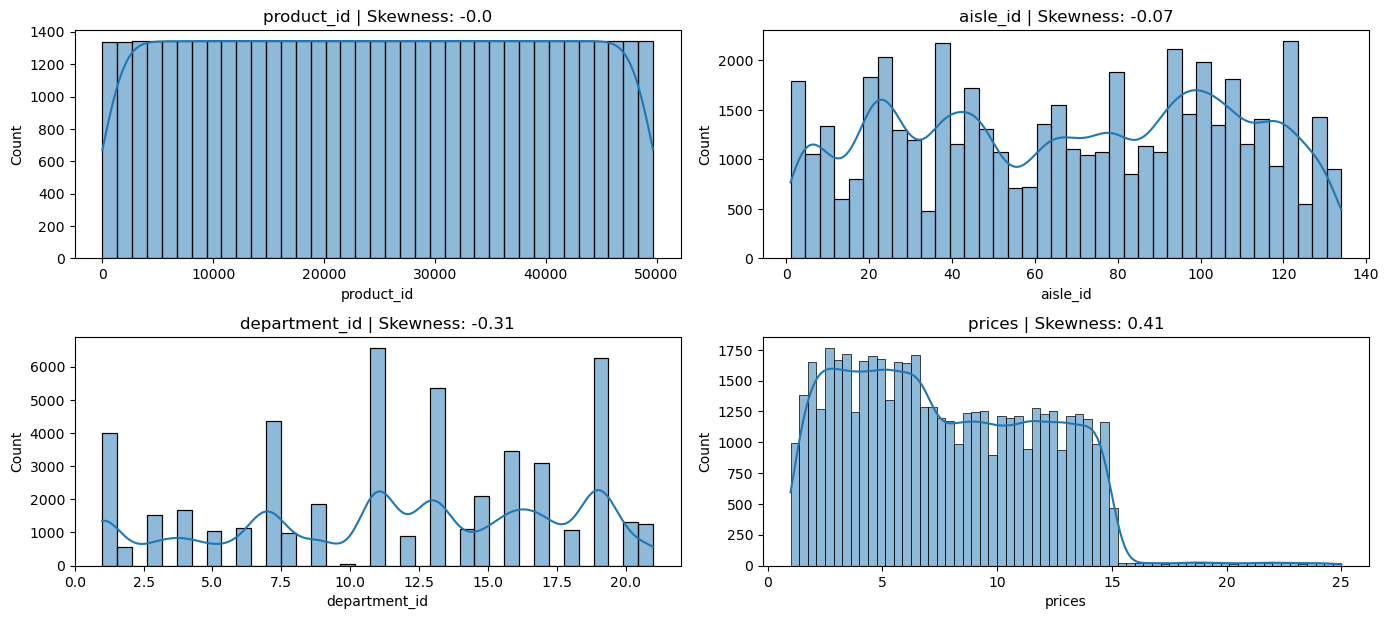

In [46]:
#sns.set_style("darkgrid")

numerical_columns = df_products.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_products[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_products[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [47]:
#Export cleaned dataset
df_products.to_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '02_cleaned_products.pkl'))